# Fake Currency Detection (Comparitive Study)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [2]:
data = pd.read_csv('data_banknote_authentication.csv', header=None)
data.columns = ['var', 'skew', 'curt', 'entr', 'auth']
# Variance of the image transformed into wavelets
# Asymmetry of the image transformed into wavelets
# Kurtosis of the image transformed into wavelets
# Image entropy
# Authorization: 0 for real banknotes and 1 for fake banknotes
data.head()
print(data.shape)

(1372, 5)


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var     1372 non-null   float64
 1   skew    1372 non-null   float64
 2   curt    1372 non-null   float64
 3   entr    1372 non-null   float64
 4   auth    1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


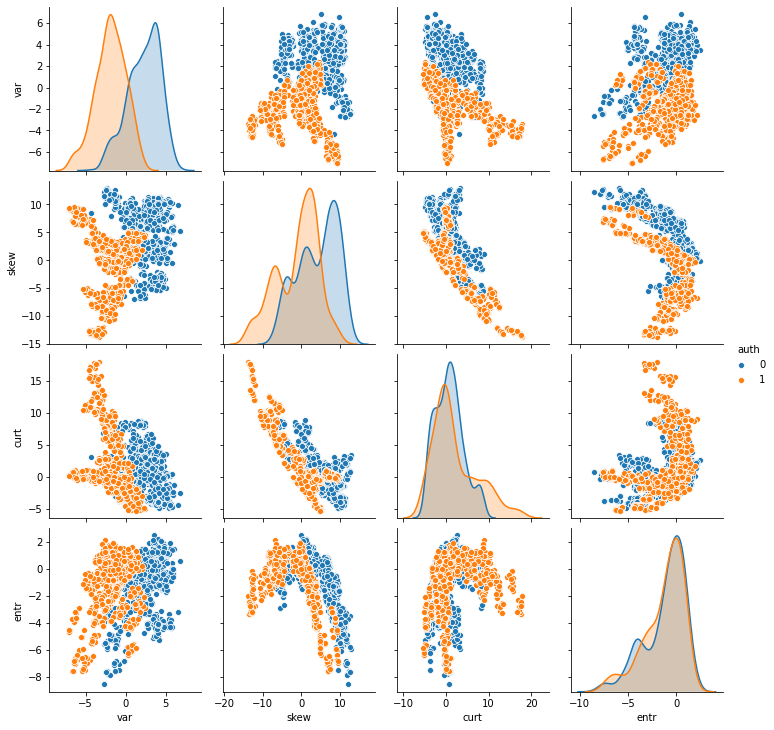

In [14]:
# Multivariate analysis (x&y plot with different colors)
sns.pairplot(data, hue='auth')
plt.show()

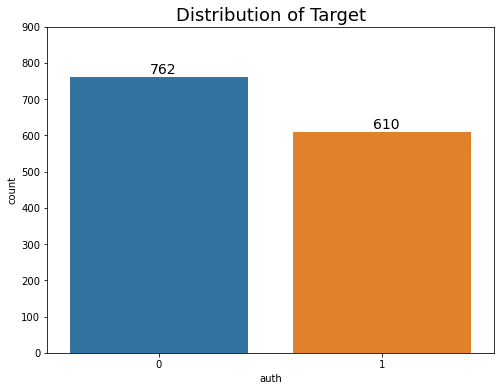

In [15]:
# Plotting the count of different target variables
plt.figure(figsize=(8,6))
plt.title('Distribution of Target', size=18)
sns.countplot(x=data['auth'])
target_count = data.auth.value_counts()
plt.annotate(s=target_count[0], xy=(-0.04,10+target_count[0]), size=14)
plt.annotate(s=target_count[1], xy=(0.96,10+target_count[1]), size=14)
plt.ylim(0,900)
plt.show()

In [20]:
x = data.drop('auth', axis = 'columns')
y = data['auth']

# Handling imbalanced data
# Method: oversampling minority class using SMOTE (Synthetic Minority Oversampling Technique)
smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [21]:
# Scaling the data for better model building and performance
scalar = StandardScaler()
scalar.fit(x_train)
x_train = scalar.transform(x_train)
x_test = scalar.transform(x_test)

In [41]:
# Model fitting using Logistic Regression
model1 = LogisticRegression(solver='liblinear', random_state=0, multi_class='ovr')
model1.fit(x_train, y_train)
y_pred = np.array(model1.predict(x_test))
print(confusion_matrix(y_test, y_pred)) 
print(classification_report(y_test, y_pred))

[[120   2]
 [  1 121]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       122
           1       0.98      0.99      0.99       122

    accuracy                           0.99       244
   macro avg       0.99      0.99      0.99       244
weighted avg       0.99      0.99      0.99       244



In [40]:
# Model fitting using Gaussian Naive Bayes
model2 = GaussianNB()
model2.fit(x_train,y_train)
y_pred2 = model2.predict(x_test)
print(confusion_matrix(y_test, y_pred2)) 
print(classification_report(y_test, y_pred2))

[[109  13]
 [ 27  95]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       122
           1       0.88      0.78      0.83       122

    accuracy                           0.84       244
   macro avg       0.84      0.84      0.84       244
weighted avg       0.84      0.84      0.84       244



In [42]:
# Model fitting using Support Vector Machine

from sklearn.svm import SVC
model3 = SVC(C=1, gamma=10, kernel='linear')
model3.fit(x_train,y_train)
y_pred3 = model3.predict(x_test)
print(confusion_matrix(y_test, y_pred3)) 
print(classification_report(y_test, y_pred3))

[[120   2]
 [  1 121]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       122
           1       0.98      0.99      0.99       122

    accuracy                           0.99       244
   macro avg       0.99      0.99      0.99       244
weighted avg       0.99      0.99      0.99       244



In [43]:
# Model fitting using Support Vector Machine with hyperparameter tuning using GridSearchCV

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

gscv = GridSearchCV(SVC(gamma='auto'), {
    'C': [1,10,20],
    'kernel': ['rbf','linear']
}, cv=5, return_train_score=False)

gscv.fit(x_train, y_train)

df_gscv = pd.DataFrame(gscv.cv_results_)
df_gscv[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,1.000000
1,1,linear,0.986677
2,10,rbf,1.000000
3,10,linear,0.990774
4,20,rbf,1.000000
5,20,linear,0.988728
